### Task 2: Provide a data-driven recommendation on where the marketing team should focus in order to increase revenues. ###

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from util.preprocessing import preprocess_data, coef_weights

In [52]:
# loading the raw dataset
df = pd.read_csv('data/hotels.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### Preprocessing: ####

Dataset handled in the following steps:
- columns with a high amount of missing data are dropped, columns with a lower amount of missing entries are not dropped entirely, rather rows are dropped where the missing entries are
- the dataset is split into x (features) and y (target variable)
- categorical variables are handled using One-Hot Encoding, numerical variables are normalized
- afterwards, x and y dataframes are split into train- and test datasets respectively

In [55]:
x, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

All columns handled.
(118898, 244) (118898,)


#### Coefficients of linear model calculated: ####

In order to determine how much each feature influences the target variable (is_canceled), a linear model is trained (Logistic Regression), where the result is a linear combination of each variable multiplied by their respective coefficients. These coefficients being positive mean that a positive change in its corresponding feature increase the likelyhood of cancellation of a reservation.

In [13]:
lm_model = LogisticRegression(solver='sag')
lm_model.fit(X_train, y_train)
coef_df = coef_weights(lm_model, X_train)
coef_df.head(30)

,est_int,coefs,abs_coefs
242,required_car_parking_spaces,-21.240472,21.240472
237,previous_cancellations,15.633474,15.633474
241,adr,7.169507,7.169507
239,booking_changes,-6.984007,6.984007
233,adults,6.255337,6.255337
238,previous_bookings_not_canceled,-5.173858,5.173858
222,deposit_type_Non Refund,4.505894,4.505894
227,lead_time,4.104773,4.104773
218,assigned_room_type_I,-3.944240,3.944240
243,total_of_special_requests,-3.800313,3.800313


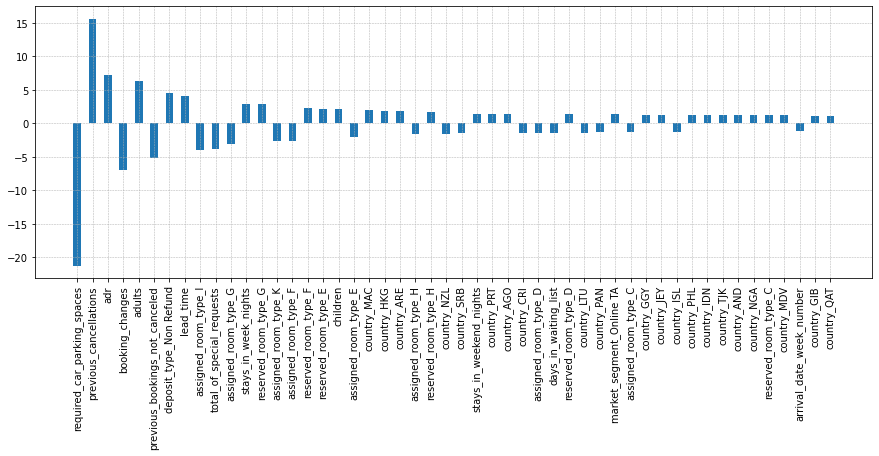

In [60]:
df_tmp = coef_df.head(50)

fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df_tmp.est_int, df_tmp.coefs,width=0.5)
plt.xticks(df_tmp.est_int,rotation=90)
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

In [54]:
coef_df.loc[coef_df['est_int'] == 'hotel_Resort Hotel'].coefs.iloc[0]

-0.26122509661460735

In [44]:
coef_df.sort_values(by='coefs',ascending=True).head(30)

,est_int,coefs,abs_coefs
242,required_car_parking_spaces,-21.240472,21.240472
239,booking_changes,-6.984007,6.984007
238,previous_bookings_not_canceled,-5.173858,5.173858
218,assigned_room_type_I,-3.944240,3.944240
243,total_of_special_requests,-3.800313,3.800313
216,assigned_room_type_G,-3.096089,3.096089
219,assigned_room_type_K,-2.705856,2.705856
215,assigned_room_type_F,-2.584165,2.584165
214,assigned_room_type_E,-2.032355,2.032355
217,assigned_room_type_H,-1.646591,1.646591


#### Suggestions to increase revenue: ####

The goal is to look for coefficients that correspond to features that can be influenced by marketing. One such variable, for example is the country of origin, because it defines a clear segmentation between multiple customer groups. In contrast, while customers needing multiple parking spaces (most likely then resulting in a larger group reservation) greatly decreases the likelyhood of cancellation according to the model, I would argue it's more difficult to target such a group. Therefore I came up with the following suggestions to decrease the likelyhood of cancellations, therefore increasing revenue:

- resort hotel -> negative coefficient -> less likely to cancel
- adr -> positive coef -> cheaper rooms are less likely to be canceled
- adults/children -> positive coef -> fewer people = less likely cancel (especially adults, because coef(adults) > coef(children))
- lead time -> positive coef -> shorter notices on reservations yield lower probability of cancellation
- previous_bookings_not_canceled -> negative coef -> customers who have previous bookings that were not cancelled are less likely to cancel
- countries to target -> with the lowest ("most negative") coefficients -> New Zealand, Serbia, Costa Rica
- room types I,G,K,F are least likely to be cancelled